In [1]:
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import random
import itertools
import matplotlib.colors as mcolors
import numpy as np
from utils import cifar10_means, cifar10_stds
from torchvision import transforms
import torch

In [2]:
train_transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize(mean=cifar10_means, std=cifar10_stds)]
)
train_dataset = CIFAR10(
    root="./.download/train", train=True, transform=train_transform, target_transform=None, download=True
)
test_dataset = CIFAR10(
    root="./.download/test", train=False, transform=train_transform, target_transform=None, download=True
)

In [31]:
label2name = {
    0: "airplane",
    1: "car",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck",
}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9158674..1.6433387].


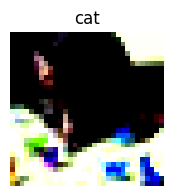

In [49]:
image2, label = random.choice(train_dataset)
plt.figure(figsize=(2, 2))
image2 = image2.permute(1, 2, 0)
plt.imshow(image2)
plt.title(label2name[label])
plt.axis("off")
plt.show()

# Training data

In [148]:
structured = {}
for label, name in label2name.items():
    structured[name] = [(idx, sample) for idx, sample in enumerate(train_dataset) if sample[1] == label]
pos = 0

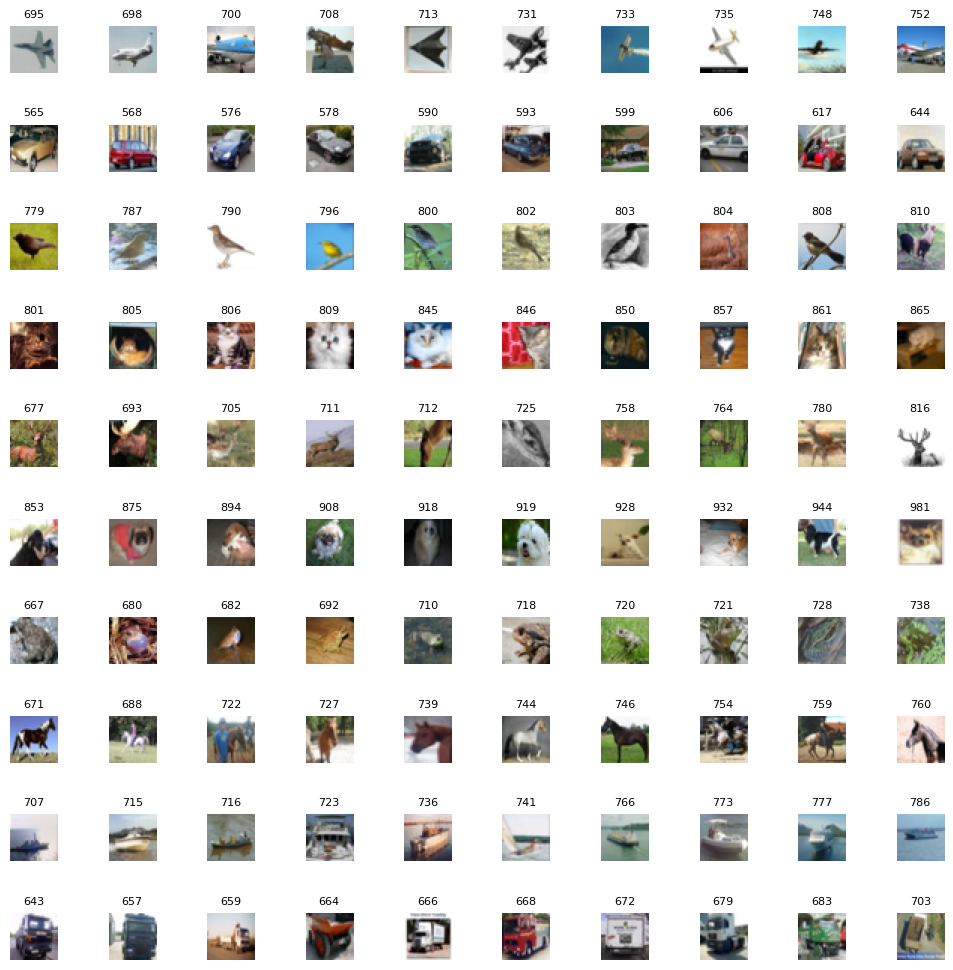

In [158]:
rows, cols = 10, 10
fig, axes = plt.subplots(10, cols, figsize=(cols, rows))
fig.tight_layout()

for row in range(rows):
    for col in range(cols):
        idx, sample = structured[label2name[row]][pos + col]
        image, label = sample
        ax = axes[row, col]
        ax.imshow(image)
        ax.set_title(str(idx), fontsize=8)
        ax.axis("off")

pos += 10
plt.show()

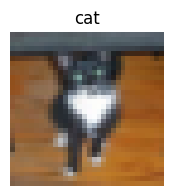

In [229]:
image, label = train_dataset[idx]
plt.figure(figsize=(2, 2))
plt.imshow(image)
plt.title(label2name[label])
plt.axis("off")
plt.show()
idx += 1

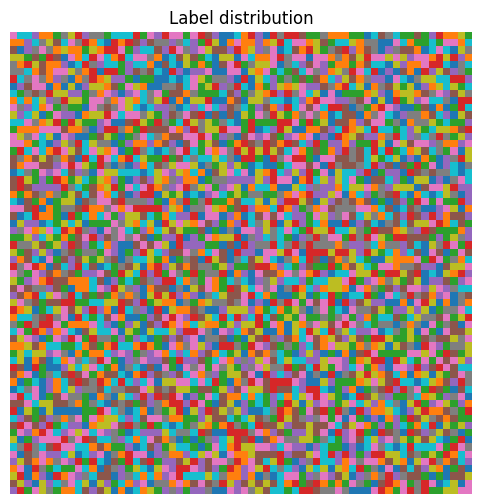

In [184]:
labels = [s[1] for s in train_dataset][: (64 * 64)]
label_array = np.array(labels).reshape((64, 64))
cmap = plt.get_cmap("tab10")
norm = mcolors.BoundaryNorm(boundaries=np.arange(10 + 1) - 0.5, ncolors=10)

plt.figure(figsize=(6, 6))
plt.imshow(label_array, cmap=cmap, norm=norm)
plt.axis("off")
plt.title("Label distribution")
plt.show()

# Color distributions after normalizing

In [5]:
X = torch.stack([row[0] for row in train_dataset])
X.shape

torch.Size([50000, 3, 32, 32])

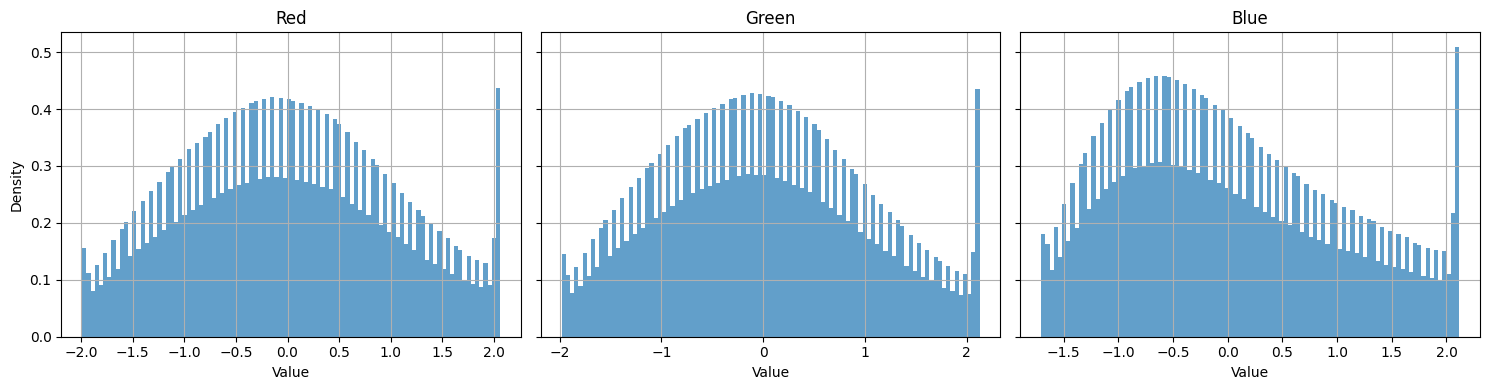

In [19]:
array = X.transpose(0, 1).reshape(3, -1).cpu().numpy()
red, green, blue = array[0], array[1], array[2]

fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

axs[0].hist(red, bins=100, alpha=0.7, density=True)
axs[0].set_title("Red")

axs[1].hist(green, bins=100, alpha=0.7, density=True)
axs[1].set_title("Green")

axs[2].hist(blue, bins=100, alpha=0.7, density=True)
axs[2].set_title("Blue")

for ax in axs:
    ax.set_xlabel("Value")
    ax.grid(True)
axs[0].set_ylabel("Density")

plt.tight_layout()
plt.show()

In [26]:
print(f"{len([t for t in blue if t > 2.0])}/{len(blue)}")

1637139/51200000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7870275..1.693943].


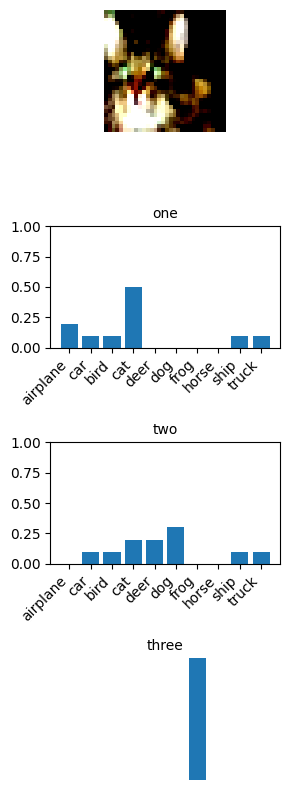

In [ ]:
probs = np.array([0.2, 0.1, 0.1, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1])
labels = list(label2name.values())
titles = ["one", "two", "three"]
probs_batch = [
    [0.2, 0.1, 0.1, 0.5, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1],
    [0.0, 0.1, 0.1, 0.2, 0.2, 0.3, 0.0, 0.0, 0.1, 0.1],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
]
probs_batch2 = [
    [0.2, 0.1, 0.1, 0.5, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1],
    [0.0, 0.1, 0.1, 0.2, 0.2, 0.3, 0.0, 0.0, 0.1, 0.1],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
]

N = len(probs_batch)
rows = N + 1
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 2))
axes = axes.flatten()  # Flatten in case it's 2D

ax = axes[0]
ax.imshow(image)
ax.axis("off")


for i in range(1, N + 1):
    probs = probs_batch[i - 1]
    ax = axes[i]
    ax.bar(range(10), probs, tick_label=labels)
    ax.set_ylim(0, 1)
    ax.set_title(titles[i - 1], fontsize=10)
    ax.set_xticks(range(10))
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
        tick.set_ha("right")

# Hide any extra subplots
for i in range(N, len(axes)):
    axes[i].axis("off")

plt.tight_layout()
plt.show()